In [22]:
# import packages
import numpy as np
import pandas as pd

from scipy.optimize import minimize
from scipy.optimize import fsolve
import scipy.stats as stats

import statsmodels.api as sm
import matplotlib.pyplot as plt
from functools import partial

import warnings
warnings.filterwarnings("ignore")

Use Python to answer the following questions. Show the code and provide complete sentences as your answers. Submit the .ipynb to Canvas. 

# Q1

If the weekly sales quantity of a product follows a Normal distribution with $\mu = 100$ and $\sigma = 10$.

a) What is the probalitiy that the sales quantity is between 90 and 95 in a week?   
b) What is the minimum quantity the manager should keep in the inventory at the start of a week so that the probability of stockout (sales greater than inventory) is less than 10%?

Q1 a):

In [23]:
from scipy.stats import expon, norm
import math

In [24]:
X = norm(loc = 100, scale = 10)

In [25]:
X.cdf(95) - X.cdf(90)

0.1498822847945298

In [26]:
X.ppf(0.9)

112.815515655446

Wrong Answer :)

In [27]:
stats.norm.pdf(95, loc=100, scale=10)

0.03520653267642995

In [28]:
stats.norm.pdf(90, loc=100, scale=10)

0.024197072451914336

In [29]:
stats.norm.pdf(95, loc=100, scale=10) - stats.norm.pdf(90, loc=100, scale=10)

0.011009460224515617

# Q2
Suppose that in Hoboken, the number of traffic accidents can be approximated by a Poisson distribution with λ = 2.5 per month. 

a) What is the probability of five or more than five traffic accidents in one month?   
b) What is the median number of traffic accidents in one month?

In [30]:
from scipy.stats import poisson 

In [31]:
1 - poisson.cdf( k=5, mu =2.5)

0.042021038195306115

In [32]:
Y = poisson (2.5)

In [33]:
Y.median()

2.0

# Q3.

Assuming that the following data (raw_data_hw) is generated by a Beta distribution, find the MLE for a and b.

Hints: 
1. You need to use the [scipy.stats.beta class](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html).  
2. The 'true' parameters are a = 4, b = 2. You estimates shouldn't be far off. 

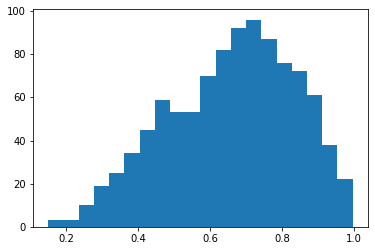

In [34]:
raw_data_hw = np.loadtxt('https://fmai-teaching.s3.amazonaws.com/bia652/est/b.txt')
histogram = plt.hist(raw_data_hw, bins=20)

In [35]:
# let's assume that the data is generated from a gamma distribution
def negLL_Beta(params, raw_data):
    
    a, b = params[0], params[1]
    LL = np.sum(stats.beta.logpdf(raw_data, a,b)) # scale = 1/beta, pay attention to the parameterization of gamma distribution 
    negLL = -LL
    
    return(negLL)

In [36]:
result = minimize(partial(negLL_Beta, raw_data=raw_data_hw), x0 = (0, 1), method = 'Nelder-Mead', options={'disp': True})

print("\n", 
      "The parameters we get from MLE: ", "\n", 
      "MLE estimate a-hat: ", result['x'][0], "\n",
      "MLE estimate b-hat: ", result['x'][1], "\n"
      )

Optimization terminated successfully.
         Current function value: -365.424546
         Iterations: 73
         Function evaluations: 136

 The parameters we get from MLE:  
 MLE estimate a-hat:  4.080323146060941 
 MLE estimate b-hat:  2.093581799333127 

